In [1]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV and Process the data

In [2]:
#Connecting Database instance 
conn = sqlite3.connect('../database/delhi.sqlite')

In [3]:
#Creating the cursor
c = conn.cursor()
#Creating the DataFrame
query = c.execute("SELECT * From delhi_table;")
cols = [column[0] for column in query.description]
df= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)
df

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
0,19961101-11:00,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-16:00,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
2,19961101-18:00,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,0.0
3,19961102-02:00,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,9.3
4,19961102-03:00,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80652,20170424-06:00,Haze,17.0,0,0,25.0,1005.0,0,0,34.0,0,0,4.0,320.0,NW,11.1
80653,20170424-09:00,Haze,14.0,0,0,16.0,1003.0,0,0,38.0,0,0,4.0,320.0,NW,22.2
80654,20170424-12:00,Haze,12.0,0,0,14.0,1002.0,0,0,36.0,0,0,4.0,270.0,West,18.5
80655,20170424-15:00,Haze,15.0,0,0,27.0,1004.0,0,0,32.0,0,0,2.0,320.0,NW,3.7


In [4]:
# Extracting the year 
def extract_year(value):
    return (value[0:4])
df["year"] = df["datetime_utc"].apply(lambda x:extract_year(x))

In [5]:
# Extracting month
def extract_month(value):
    return (value[4:6])
df["month"] = df["datetime_utc"].apply(lambda x:extract_month(x))

In [6]:
df.head()

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm,year,month
0,19961101-11:00,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-16:00,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11
2,19961101-18:00,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,0.0,1996,11
3,19961102-02:00,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,9.3,1996,11
4,19961102-03:00,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,9.3,1996,11


In [7]:
df.dtypes

datetime_utc     object
conds            object
dewptm          float64
fog               int64
hail              int64
hum             float64
pressurem       float64
rain              int64
snow              int64
tempm           float64
thunder           int64
tornado           int64
vism            float64
wdird           float64
wdire            object
wspdm           float64
year             object
month            object
dtype: object

In [8]:
# Dropping three columns 'datetime_utc', 'wdire'
df = df.drop(['datetime_utc', 'wdire'], axis =1)
df.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,year,month
0,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,1996,11
1,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,1996,11
2,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0,1996,11
3,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3,1996,11
4,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3,1996,11


In [9]:
df.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'year',
       'month'],
      dtype='object')

In [10]:
ordered_columns = ['year','month', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'conds']
df = df[ordered_columns]

In [11]:
df.head()

,year,month,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,conds
0,1996,11,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,Haze
1,1996,11,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,Haze
2,1996,11,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0,Haze
3,1996,11,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3,Haze
4,1996,11,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3,Haze


In [12]:
df.conds.value_counts()

Haze      65925
Rain       6022
Cloudy     5832
Clear      2878
Name: conds, dtype: int64

In [13]:
# Create our features
X = df.drop("conds", axis=1)

# Create our target
y = df["conds"]


In [14]:
X.describe()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
count,80657.000000,80657.000000,80657.000000,80657.000000,8.065700e+04,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000
mean,15.676445,0.050907,0.000136,55.171926,2.199730e+03,0.027102,0.000012,26.340045,0.010216,0.000025,2.563318,169.093891,8.976131
std,7.150146,0.219809,0.011677,23.447379,3.558458e+05,0.162383,0.003521,8.242780,0.100558,0.004980,22.690289,118.166457,12.084670
min,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,36.000000,1.001000e+03,0.000000,0.000000,20.000000,0.000000,0.000000,1.800000,60.000000,3.700000
50%,15.000000,0.000000,0.000000,55.000000,1.008000e+03,0.000000,0.000000,28.000000,0.000000,0.000000,2.200000,170.000000,7.400000
75%,22.000000,0.000000,0.000000,74.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.000000,3.000000,270.000000,13.000000
max,35.000000,1.000000,1.000000,100.000000,1.010614e+08,1.000000,1.000000,72.000000,1.000000,1.000000,6436.000000,960.000000,1514.900000


In [15]:
y.value_counts()

Haze      65925
Rain       6022
Cloudy     5832
Clear      2878
Name: conds, dtype: int64

# Split the Data into Training and Testing¶

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
dt_model = model.fit(X_train, y_train)

In [18]:
dt_model.score(X_train,y_train)

0.9991073199761952

In [19]:
dt_model.score(X_test,y_test)

0.8996280684354079

In [20]:
dt_ypred = dt_model.predict(X_test)
dt_ypred

array(['Haze', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

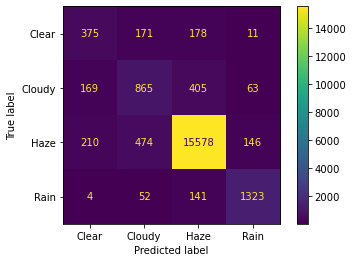

In [21]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_cm = confusion_matrix(y_test, dt_ypred, labels=dt_model.classes_)
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt_model.classes_)
dt_disp.plot()

In [22]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, dt_ypred)
acc_score

0.8996280684354079

In [23]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, dt_ypred)

0.7264781349060165

In [24]:
# printing the classification report
from sklearn.metrics import classification_report
dt_clf_report = (classification_report(y_test, dt_ypred))
print(dt_clf_report)

              precision    recall  f1-score   support

       Clear       0.49      0.51      0.50       735
      Cloudy       0.55      0.58      0.56      1502
        Haze       0.96      0.95      0.95     16408
        Rain       0.86      0.87      0.86      1520

    accuracy                           0.90     20165
   macro avg       0.72      0.73      0.72     20165
weighted avg       0.90      0.90      0.90     20165



In [25]:
# check Important features
ft_imp_dt_clf = pd.DataFrame(
    {"feature": list(X.columns), "importance": dt_model.feature_importances_}
).sort_values("importance", ascending=False)

# Display
ft_imp_dt_clf

,feature,importance
0,year,0.167430
12,vism,0.148770
7,rain,0.133086
5,hum,0.124056
9,tempm,0.075479
6,pressurem,0.073639
13,wdird,0.060688
2,dewptm,0.055536
14,wspdm,0.053702
3,fog,0.051855


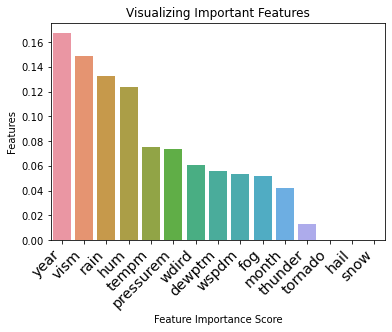

In [26]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=ft_imp_dt_clf.feature, y=ft_imp_dt_clf.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

# RandomOverSampling

In [27]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'Clear': 49517, 'Haze': 49517, 'Cloudy': 49517, 'Rain': 49517})

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_ros_model = DecisionTreeClassifier()
dt_ros_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [29]:
dt_ros_model.score(X_resampled, y_resampled)

0.9990811236545025

In [30]:
dt_ros_model.score(X_test, y_test)

0.9021076121993553

In [31]:
dt_ros_ypred = dt_ros_model.predict(X_test)
dt_ros_ypred

array(['Cloudy', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'],
      dtype=object)

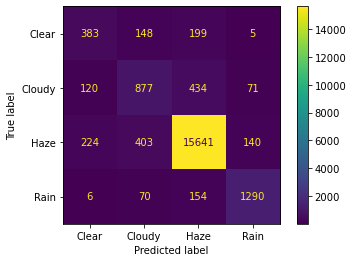

In [32]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_ros_cm = confusion_matrix(y_test, dt_ros_ypred, labels=dt_ros_model.classes_)
dt_ros_disp = ConfusionMatrixDisplay(confusion_matrix=dt_ros_cm, display_labels=dt_ros_model.classes_)
dt_ros_disp.plot()

In [33]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_ros_ypred)

0.9021076121993553

In [34]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, dt_ros_ypred)

0.7267288262575193

In [35]:
# printing the classification report
from sklearn.metrics import classification_report
dt_ros_clf_report = (classification_report(y_test, dt_ros_ypred))
print(dt_ros_clf_report)

              precision    recall  f1-score   support

       Clear       0.52      0.52      0.52       735
      Cloudy       0.59      0.58      0.58      1502
        Haze       0.95      0.95      0.95     16408
        Rain       0.86      0.85      0.85      1520

    accuracy                           0.90     20165
   macro avg       0.73      0.73      0.73     20165
weighted avg       0.90      0.90      0.90     20165



In [36]:
# check Important features
ft_imp_dt_ros = pd.DataFrame(
    {"feature": list(X.columns), "importance": dt_ros_model.feature_importances_}
).sort_values("importance", ascending=False)

# Display
ft_imp_dt_ros

,feature,importance
0,year,0.189000
5,hum,0.168086
12,vism,0.126378
7,rain,0.092322
2,dewptm,0.072416
6,pressurem,0.069222
1,month,0.063456
13,wdird,0.061581
9,tempm,0.061195
14,wspdm,0.055585


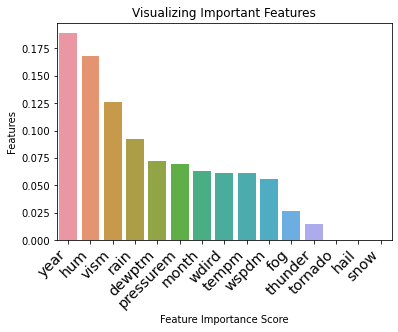

In [37]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=ft_imp_dt_ros.feature, y=ft_imp_dt_ros.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

# RandomUnderSampling

In [38]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'Clear': 2143, 'Cloudy': 2143, 'Haze': 2143, 'Rain': 2143})

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_rus_model = DecisionTreeClassifier()
dt_rus_model.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [40]:
dt_rus_model.score(X_resampled, y_resampled)

0.999066728884741

In [41]:
dt_rus_model.score(X_test, y_test)

0.7534341681130672

In [42]:
dt_rus_ypred = dt_rus_model.predict(X_test)
dt_rus_ypred

array(['Cloudy', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'],
      dtype=object)

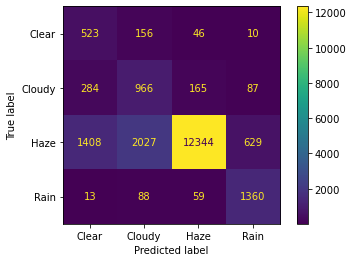

In [43]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_rus_cm = confusion_matrix(y_test, dt_rus_ypred, labels=dt_rus_model.classes_)
dt_rus_disp = ConfusionMatrixDisplay(confusion_matrix=dt_rus_cm, display_labels=dt_rus_model.classes_)
dt_rus_disp.plot()

In [44]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_rus_ypred)

0.7534341681130672

In [45]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, dt_rus_ypred)

0.7504399720238908

In [46]:
# printing the classification report
from sklearn.metrics import classification_report
dt_rus_clf_report = (classification_report(y_test, dt_rus_ypred))
print(dt_rus_clf_report)

              precision    recall  f1-score   support

       Clear       0.23      0.71      0.35       735
      Cloudy       0.30      0.64      0.41      1502
        Haze       0.98      0.75      0.85     16408
        Rain       0.65      0.89      0.75      1520

    accuracy                           0.75     20165
   macro avg       0.54      0.75      0.59     20165
weighted avg       0.88      0.75      0.79     20165



In [47]:
# check Important features
ft_imp_dt_rus = pd.DataFrame(
    {"feature": list(X.columns), "importance": dt_rus_model.feature_importances_}
).sort_values("importance", ascending=False)

# Display
ft_imp_dt_rus

,feature,importance
0,year,0.184539
5,hum,0.178046
12,vism,0.122131
7,rain,0.088321
6,pressurem,0.073511
1,month,0.069828
9,tempm,0.067589
13,wdird,0.062934
14,wspdm,0.060941
2,dewptm,0.053836


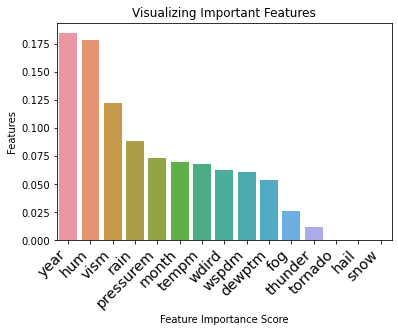

In [48]:
# visualize important featuers

# Creating a bar plot
sns.barplot(x=ft_imp_dt_rus.feature, y=ft_imp_dt_rus.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()